<a href="https://colab.research.google.com/github/JerryK97/dl12/blob/main/project/dl12_proj02_XOR_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XOR problem
## numpy with back propagation
## MLP
- 1-hidden layer
- 2 hidden-layers
- hyperparameter setting

In [ ]:
# numpy - bak propagation with iterations=20000
import numpy as np
# XOR solution by MLP

# 시그모이드 함수
def actf(x):
	return 1/(1+np.exp(-x))

# 시그모이드 함수의 미분치
def actf_deriv(x):
	    return x*(1-x)

# 입력유닛의 개수, 은닉유닛의 개수, 출력유닛의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate = 0.5

# 훈련 입력과 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # (4,2)
T = np.array([[0], [1], [1], [0]])              # (4,1)

# 가중치를 –1.0에서 1.0 사이의 난수로 초기화한다.
W1 = 2*np.random.random((inputs, hiddens))-1    # (2,2)
W2 = 2*np.random.random((hiddens, outputs))-1   # (2,1)
B1 = np.zeros(hiddens)                          # (2,)
B2 = np.zeros(outputs)                          # (1,)
print(W1.shape,W2.shape,B1.shape,B2.shape)

# 순방향 전파 계산
def predict(x):
        layer0 = x			# 입력을 layer0에 대입한다. 
        Z1 = np.dot(layer0, W1)+B1	# 행렬의 곱을 계산한다. 
        layer1 = actf(Z1)		# 활성화 함수를 적용한다. 
        Z2 = np.dot(layer1, W2)+B2	# 행렬의 곱을 계산한다. 
        layer2 = actf(Z2)		# 활성화 함수를 적용한다. 
        return layer0, layer1, layer2
    
# 역방향 전파 계산
def fit():
    global W1, W2, B1, B2
    for i in range(20000):
            layer0, layer1, layer2 = predict(X) # input-batch-size = 4
            layer2_error = layer2-T
            # print(layer0.shape,layer1.shape,layer2.shape)
            
            layer2_delta = layer2_error*actf_deriv(layer2)
            layer1_error = np.dot(layer2_delta, W2.T)
            layer1_delta = layer1_error*actf_deriv(layer1)
            # print(layer2_error.shape)
            # print(layer2_delta.shape)
            # print(layer1_error.shape)
            # print(layer1_delta.shape)
            
            W2 += -learning_rate*np.dot(layer1.T, layer2_delta)/4.0  # 4개의 입력에 대한 평균 기울기
            W1 += -learning_rate*np.dot(layer0.T, layer1_delta)/4.0
            B2 += -learning_rate*np.sum(layer2_delta, axis=0)/4.0
            B1 += -learning_rate*np.sum(layer1_delta, axis=0)/4.0

def test():
    for x, y in zip(X, T):
        x = np.reshape(x, (1, -1))		# 하나여도 2차원 형태이어야 한다.
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2)

fit()
test()

(2, 2) (2, 1) (2,) (1,)
[[0 0]] [0] [[0.0275429]]
[[0 1]] [1] [[0.96899939]]
[[1 0]] [1] [[0.97358685]]
[[1 1]] [0] [[0.02464057]]


> ### Does numpy with back propagation solve XOR problem?

In [ ]:
# Keras MLP with 1 hidden layer, epochs=2000
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=2, input_shape=(2,), activation='sigmoid')) #
model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.SGD(lr=0.1)) 

model.summary()
 
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=2000, verbose=2)

print(model.predict(X))

> ### Not good result

In [ ]:
# # Keras MLP with 2 hidden layers and epochs=2000
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=16, input_shape=(2,), activation='relu')) #①
model.add(tf.keras.layers.Dense(units=8, activation='relu')) #
model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #		
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.SGD(lr=0.1)) 

model.summary()

X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=2000, verbose=2)

print(model.predict(X))

---
---

## [DIY] Hyperparameter control
- Find the optimal training condition with epoches=2000

> ## Try Bard, ChatGPT, Bing AI
- ### Write a MLP code to solve XOR using Keras.

Sure, here is the MLP code to solve XOR using Keras:

---

In [ ]:
import keras

# Import the data
x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [[0], [1], [1], [0]]

# Create the model
model = keras.Sequential([
  keras.layers.Dense(8, input_dim=2, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x, y, epochs=1000)

# Evaluate the model
score = model.evaluate(x, y)
print('Test accuracy:', score[1])

# Make predictions
predictions = model.predict(x)
print('Predictions:', predictions)

This code will create a MLP with 8 neurons in the hidden layer and 1 neuron in the output layer. The model will be trained on the XOR data set for 1000 epochs. After training, the model will be evaluated on the test set and the accuracy will be printed. Finally, the model will be used to make predictions on the XOR data set.

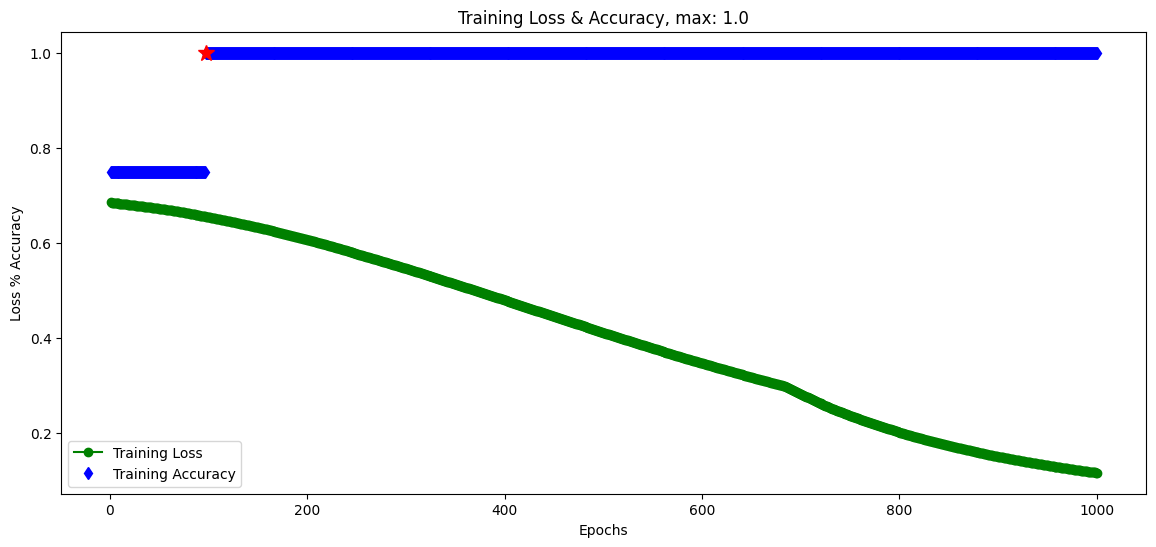

In [45]:
# Training graph
import numpy as np
import matplotlib.pyplot as plt

history_dict = history.history 
loss = history_dict['loss']
accuracy = history_dict['accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 6))

plt.subplot(1,1,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, accuracy, 'bd', label='Training Accuracy')
plt.plot(np.argmax(np.array(accuracy))+1,accuracy[np.argmax(np.array(accuracy))], 'r*', ms=12)
plt.title('Training Loss & Accuracy, max: ' + str(np.round(accuracy[np.argmax(np.array(accuracy))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss % Accuracy')
plt.legend()